# Artifact: Palmer Penguins Dataset Analysis
## Machine Learning, Fall 2021
### Name: Michael Hlavaty

__TO-DO__
1. Introduce dataset
2. Describe ethical implications of using this dataset...e.g how was the data obtained?
3. Analyze physical characterstics with respect to `sex`, `island`
4. Analyze dataset count distributions

In this notebook, I begin to dive into the Palmer Archipelago (Antarctica) penguin dataset. 

## Sources

* https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data?select=penguins_size.csv
* https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html
* https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html
* https://www.kite.com/python/docs/matplotlib.collections.PathCollection.legend_elements

## Data Exploration

In [1]:
# Importing a number of useful Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

Let's import the data. I've downloaded the necessary `.csv` files into a folder named `palmer_penguins`

In [2]:
data = pd.read_csv('palmer_penguins/penguins_size.csv')
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Okay, so here's a snippet of the dataset. I can already see some `NaN` values which will need to be cleaned. I can see also see all of the variables in the first row. According to the dataset's documentation,

* `species`: penguin species (Chinstrap, Adélie, or Gentoo)
* `culmen_length_mm`: culmen length (mm) (according to the Oxford Dictionary, the culmen is "the upper ridge of a bird's beak")
* `culmen_depth_mm`: culmen depth (mm)
* `flipper_length_mm`: flipper length (mm)
* `body_mass_g`: body mass (g)
* `island`: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
* `sex`: penguin sex



### Cleaning the Data

As noted above, we need to first clean the data by looking for `NaN` values

In [3]:
data[data.isnull().any(axis=1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


Okay, so I can see 10 penguins with missing values. Since there are more than 300 penguins, I feel comfortable removing the penguins from the dataset rather than removing the columns with the respective missing values. As observed in the table above, all the penguins with missing data also have `NaN` values for `sex`. Thus, I can remove all penguins with missing, or null data in the `sex` column.

In [10]:
data = data[data.sex.notnull()] # removing all observations (penguins) whose sex is null, or NaN
data[data.isnull().any(axis=1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


Great! It appears that we removed all `NaN` values from the dataset. However, there may still being missing or unexpected (negative) values. Let's look at some basic statistics for the dataset.

In [11]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000


There are 334 rows in the dataset. The mean `flipper_length_mm` > `culmen_length_mm` > `culmen_depth_mm`, which makes sense because I'd expect a penguin's flipper to be longer than their culmen, and I would expect that the depth of the culmen to be shorter than the length of the culmen and its flipper. There does not appear to be any outliers yet: there are no negative values based on the `min` values and the `min` doesn't appear to significantly deviate from the `25%` percentile, and the `max` values do not appear to be very large relative to the `75%` percentile. The values from this table seem reasonable, so I'll start diving a bit deeper into the dataset.

### Scatterplots

I'm familiar with using scatterplots to compare two numerical variables, so I'll start with doing those comparisons. There appear to be four numerical variables in the dataset: `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, and `body_mass_g`.

#### `culmen_depth_mm` by `culmen_length_mm` considering `species`

Let's start by comparing the culmen dimensions: `culmen_length_mm` and `culmen_depth_mm`

In [12]:
culmen_data = data[['culmen_length_mm','culmen_depth_mm']]
culmen_data

,culmen_length_mm,culmen_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
4,36.7,19.3
5,39.3,20.6
...,...,...
338,47.2,13.7
340,46.8,14.3
341,50.4,15.7
342,45.2,14.8


Okay, so here's a short output of the two variables. Let's plot this data in a scatterplot and see if we can find any trends betwen the two variables.

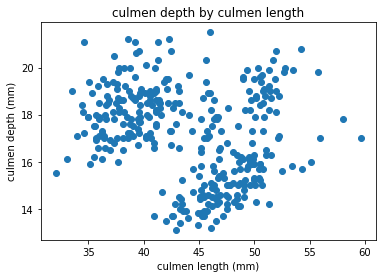

In [53]:
plt.scatter(data.culmen_length_mm, data.culmen_depth_mm)
plt.title("culmen depth by culmen length")
plt.xlabel("culmen length (mm)")
plt.ylabel("culmen depth (mm)")
plt.show()

Okay, so I can't describe a pattern for the overall distribution, but I do notice three different clusters in the scatterplot. The first one is towards the top left corner, the second in the top right corner, and the third towards middle of the bottom half. Perhaps there is a factor that directly affects these values?

There are three clusters and three `species`. Let's try plotting the scatterplot with respect to `species` and see if this explains part of the trend.

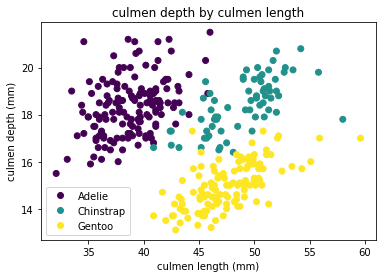

In [47]:
scatter = plt.scatter(data.culmen_length_mm, data.culmen_depth_mm, c=data.species.astype('category').cat.codes)
plt.title("culmen depth by culmen length")
plt.xlabel("culmen length (mm)")
plt.ylabel("culmen depth (mm)")
plt.legend(handles = scatter.legend_elements()[0], labels = ['Adelie','Chinstrap','Gentoo'])
plt.show()

Wow! By coloring the data points based on the penguins' `species`, the three clusters are emphasized. It appears that Adelie penguins generally has a shorter culmen length relative to the other species' but a larger culmen depth. On the other hand, Gentoo penguins typically has longer culmen lengths relatve to the other species', but a shorter culmen depth. Lastly, Chinstrap penguins typically has a large culmen length and large culmen depth relative to those of the other species'.

#### `body_mass_g` by `flipper_length_mm` considering `species`

In [15]:
flipperLength_x_bodyMass = data[['flipper_length_mm','body_mass_g']]
flipperLength_x_bodyMass

,flipper_length_mm,body_mass_g
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
4,193.0,3450.0
5,190.0,3650.0
...,...,...
338,214.0,4925.0
340,215.0,4850.0
341,222.0,5750.0
342,212.0,5200.0


Okay, so here's a short output of the two variables. Let's plot this data in a scatterplot and see if we can find any trends betwen the two variables.

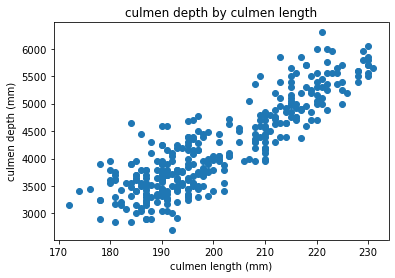

In [16]:
scatter = plt.scatter(data.flipper_length_mm, data.body_mass_g)
plt.title("culmen depth by culmen length")
plt.xlabel("culmen length (mm)")
plt.ylabel("culmen depth (mm)")
plt.show()

Wow! The overall pattern for the data appears to be positive, moderately strongly correlated, and fairly linear. I do notice two clusters, separated by a vertical axis through around `culmen_length` = 205mm. The comparison of `culmen_depth_mm` by `culmen_length_mm` revealed a strong influence of `species` on the physical characteristics of the penguins. I'll plot the graph with respect to the `species` again.

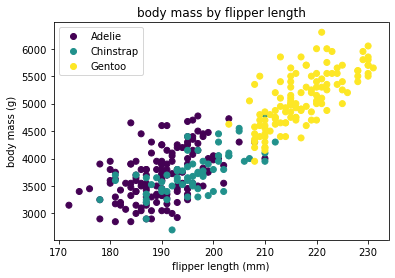

In [56]:
scatter = plt.scatter(data.flipper_length_mm, data.body_mass_g, c=data.species.astype('category').cat.codes)
plt.title("body mass by flipper length")
plt.xlabel("flipper length (mm)")
plt.ylabel("body mass (g)")
plt.legend(handles = scatter.legend_elements()[0], labels = ['Adelie','Chinstrap','Gentoo'])
plt.show()

The coloring by species isn't as distinguishing as last time, but still very distinguishing. Gentoo penguins are the cluster in the top-right of the plot, and its species seems to have the longest flipper length and body mass. Adelie and Chinstrap penguins form the cluster towards the bottom left, and since the points are relatively randomly mixed with one another, the two species have very similar flipper length and body masses.

__So this is where I'm going to stop. Everything in this notebook can be used as my artifact for the Oral Exam with Dr. Zufelt on Wednesday, November 3 at 11:45AM. To quickly summarize, I found a dataset including charactersitics of Palmer Penguins, cleaned the data, and analyzed physical characterstics with respect to each penguin's species.__